# The O'Brien-o-matic
### Which fantasy coach gets in the way of their team success the most?

### Statement of the process
#### To compare actual points earned vs potential points earned
For actual points, simply sum up points earned by status 'active' players for each team <br>
For potential points, compare the maximum number of points possible to be earned at each position

First idea, simply iterate over owners and weeks to populate a table, then compare between actual and potential

Optimization steps, find non-for loop methods

### Future Ideas
Who makes moves week to week that lose them the most points? If they just kept line up they had the previous week, would they be better off?


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [8]:
playerdf = pd.read_csv('TPlayer.csv')
playerdf

,name,position,team,week,owner,points,status,RostStatus
0,"Watson, D.",QB,HOU,1,Jake,20.82,Active,Starting
1,"Hunt, K.",RB,CLE,1,Jake,12.10,Active,Starting
2,"Jones, A.",RB,GB,1,Jake,17.60,Active,Starting
3,"Lockett, T.",WR,SEA,1,Jake,17.20,Active,Starting
4,"Thomas, M.",WR,NO,1,Jake,4.70,Active,Starting
...,...,...,...,...,...,...,...,...
2692,"Boyd, T.",WR,CIN,9,f,0.00,Inactive,Bench
2693,"Scott, B.",RB,PHI,9,f,0.00,Inactive,Bench
2694,"Fant, N.",TE,DEN,9,f,7.50,Inactive,Bench
2695,"Barkley, S.",RB,NYG,9,f,0.00,Inactive,Bench


#### Start up the O'Brien-O-Matic

In [211]:
# define the potential points function
def pot_points(data):
    pos = {'QB':1,'RB':2,'WR':3,'TE':1,'K':1,'DEF':1}
    flex = ['RB','WR','TE']
    idealteam =[]
    potpoints = 0
    # do the roster minus flex
    for p in pos:
        # iso the players in the position
        players = data.loc[data['position'] == p,:]
        # pull the players with the maximum points
        maxinfo = players.nlargest(n = pos.get(p), columns='points')
        # add the max points to the sum
        potpoints = sum(maxinfo.points,potpoints)
        # add the players to the ideal roster
        idealteam.extend(maxinfo.name)
    # now do flex
    flex = data.loc[(~data['name'].isin(idealteam)) & (data['position'].isin(flex)),:]
    flexinfo = flex.nlargest(n = 1, columns='points')
    potpoints = sum(flexinfo.points,potpoints)
    idealteam.extend(flexinfo.name)
    # the option to output the ideal roster is saved for later
    missedchance = data.loc[data['name'].isin(idealteam),:]
    return potpoints

In [212]:
# iterate over the dataframe to calculate
points = pd.DataFrame()
weeks = set(playerdf['week'].values)
owners = set(playerdf['owner'].values)
count = 0

for week in weeks:
    for owner in owners:
        data = playerdf[(playerdf['week'] == week) & (playerdf['owner'] == owner)]
        points.loc[count,'week'] = week
        points.loc[count,'owners'] = owner
        points.loc[count,'actual points'] = sum(data.loc[data['status'] == 'Active','points'])
        points.loc[count,'potential points'] = pot_points(data)
        count += 1

In [217]:
points['OBrien Quotient'] = points['actual points'] - points['potential points']

In [218]:
points

,week,owners,actual points,potential points,OBrien Quotient
0,1.0,Nolan,180.08,196.78,-16.7
1,1.0,Liam,144.38,151.48,-7.1
2,1.0,Sam,128.20,153.50,-25.3
3,1.0,Lucas,161.10,192.00,-30.9
4,1.0,Graham,167.06,179.56,-12.5
...,...,...,...,...,...
155,16.0,Jake,120.26,120.26,0.0
156,16.0,Jess,129.92,139.52,-9.6
157,16.0,Matt,165.62,171.42,-5.8
158,16.0,f,133.24,159.64,-26.4


In [226]:
# reorganize data for graphing
pointsgraph = points.pivot("week","owners","OBrien Quotient")
pointsgraph = pointsgraph.cumsum()
pointsgraph

owners,Graham,Jake,Jess,Kevin,Liam,Lucas,Matt,Nolan,Sam,f
week,,,,,,,,,,
1.0,-12.5,-26.00,-8.40,-9.70,-7.1,-30.90,-30.10,-16.70,-25.30,-24.06
2.0,-52.7,-54.94,-29.60,-37.90,-38.1,-59.00,-52.80,-32.80,-54.90,-50.28
3.0,-66.2,-60.26,-42.20,-51.50,-61.0,-67.60,-73.82,-44.70,-61.10,-91.58
4.0,-100.9,-76.46,-67.60,-68.48,-69.3,-70.90,-128.72,-44.70,-82.40,-92.28
5.0,-112.6,-85.56,-75.10,-76.36,-83.3,-82.80,-135.02,-74.70,-104.50,-102.08
6.0,-117.3,-85.56,-75.10,-107.56,-103.8,-99.30,-148.86,-75.30,-118.60,-105.68
7.0,-151.6,-87.46,-96.32,-122.66,-110.5,-99.30,-148.86,-95.00,-125.30,-145.46
8.0,-152.6,-88.66,-112.42,-123.36,-144.9,-112.22,-161.26,-107.70,-126.10,-160.90
9.0,-166.3,-96.06,-129.92,-133.36,-165.7,-136.78,-177.56,-126.40,-153.60,-186.74


<AxesSubplot:title={'center':"Increasing O'Briens Over Time"}, xlabel='week'>

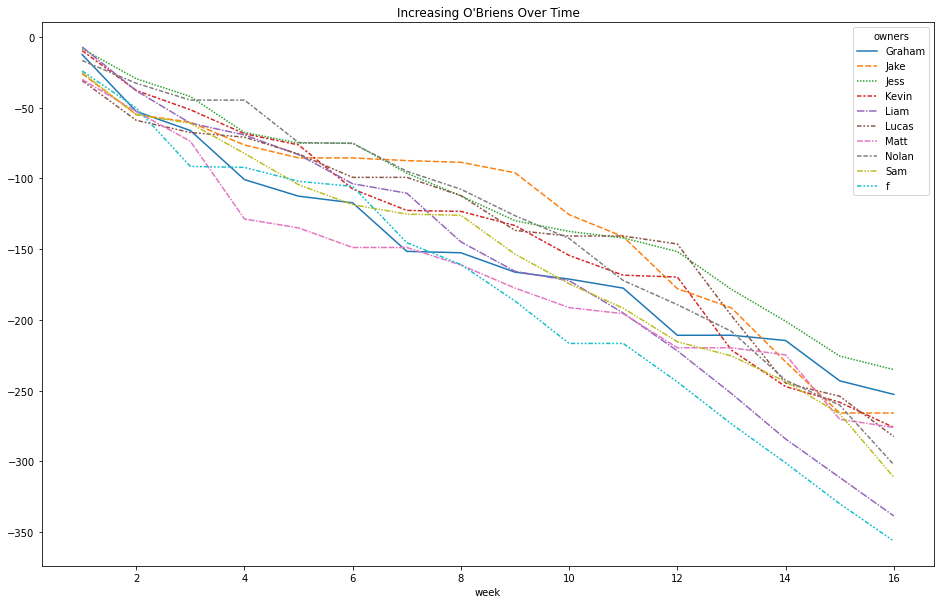

In [234]:
# plot the data
plt.figure(figsize=(16,10))
plt.title("Increasing O'Briens Over Time")
sns.lineplot(data = pointsgraph)
